In [53]:
import psycopg2
from matplotlib import pyplot as plt

In [54]:
# Рассчет RSI
def rsi(prices, period):
  gains, losses = [0]*len(prices), [0]*len(prices)
  for i in range(1, len(prices)):
    change = prices[i] - prices[i - 1]
    if change > 0:
      gains[i] = change
    else:
      losses[i] = -change
  avg_gain = sum(gains[1:period + 1]) / period
  avg_loss = sum(losses[1:period + 1]) / period
  rs_values = [None] * (period + 1)

  if avg_loss == 0:
    rs_values.append(100)
  else:
    rs = avg_gain / avg_loss
    rs_values.append(100 - (100 / (1 + rs)))

  for i in range(period + 1, len(prices)):
    avg_gain = (avg_gain * (period - 1) + gains[i]) / period
    avg_loss = (avg_loss * (period - 1) + losses[i]) / period
    if avg_loss == 0:
      rs_values.append(100)
    else:
      rs = avg_gain / avg_loss
      rs_values.append(100 - (100 / (1 + rs)))
  
  for i in range(len(rs_values)):
    if rs_values[i] is None:
      rs_values[i] = 0
  return rs_values

In [55]:
# Рассчет MA
def ma(prices, window):
  values = []
  for i in range(len(prices)):
    if i + 1 < window:
      values.append(None)
    else:
      values.append(sum(prices[i + 1 - window:i + 1]) / window)
  
  return values

In [56]:
# Рассчет MACD
def exponential_ma(prices, window):
  ema = []
  k = 2 / (window + 1)
  ema.append(sum(prices[:window]) / window)
  for i in prices[window:]:
    ema.append((i - ema[-1]) * k + ema[-1])
  
  return ema


def macd(prices):
  ema_12 = exponential_ma(prices, 12)
  ema_26 = exponential_ma(prices, 26)
  macd_line = [ema12 - ema26 for ema12, ema26 in zip(ema_12[26-12:], ema_26)]
  signal_line = exponential_ma(macd_line, 9)

  return macd_line, [None] * 25 + signal_line

International Business Machines Corp


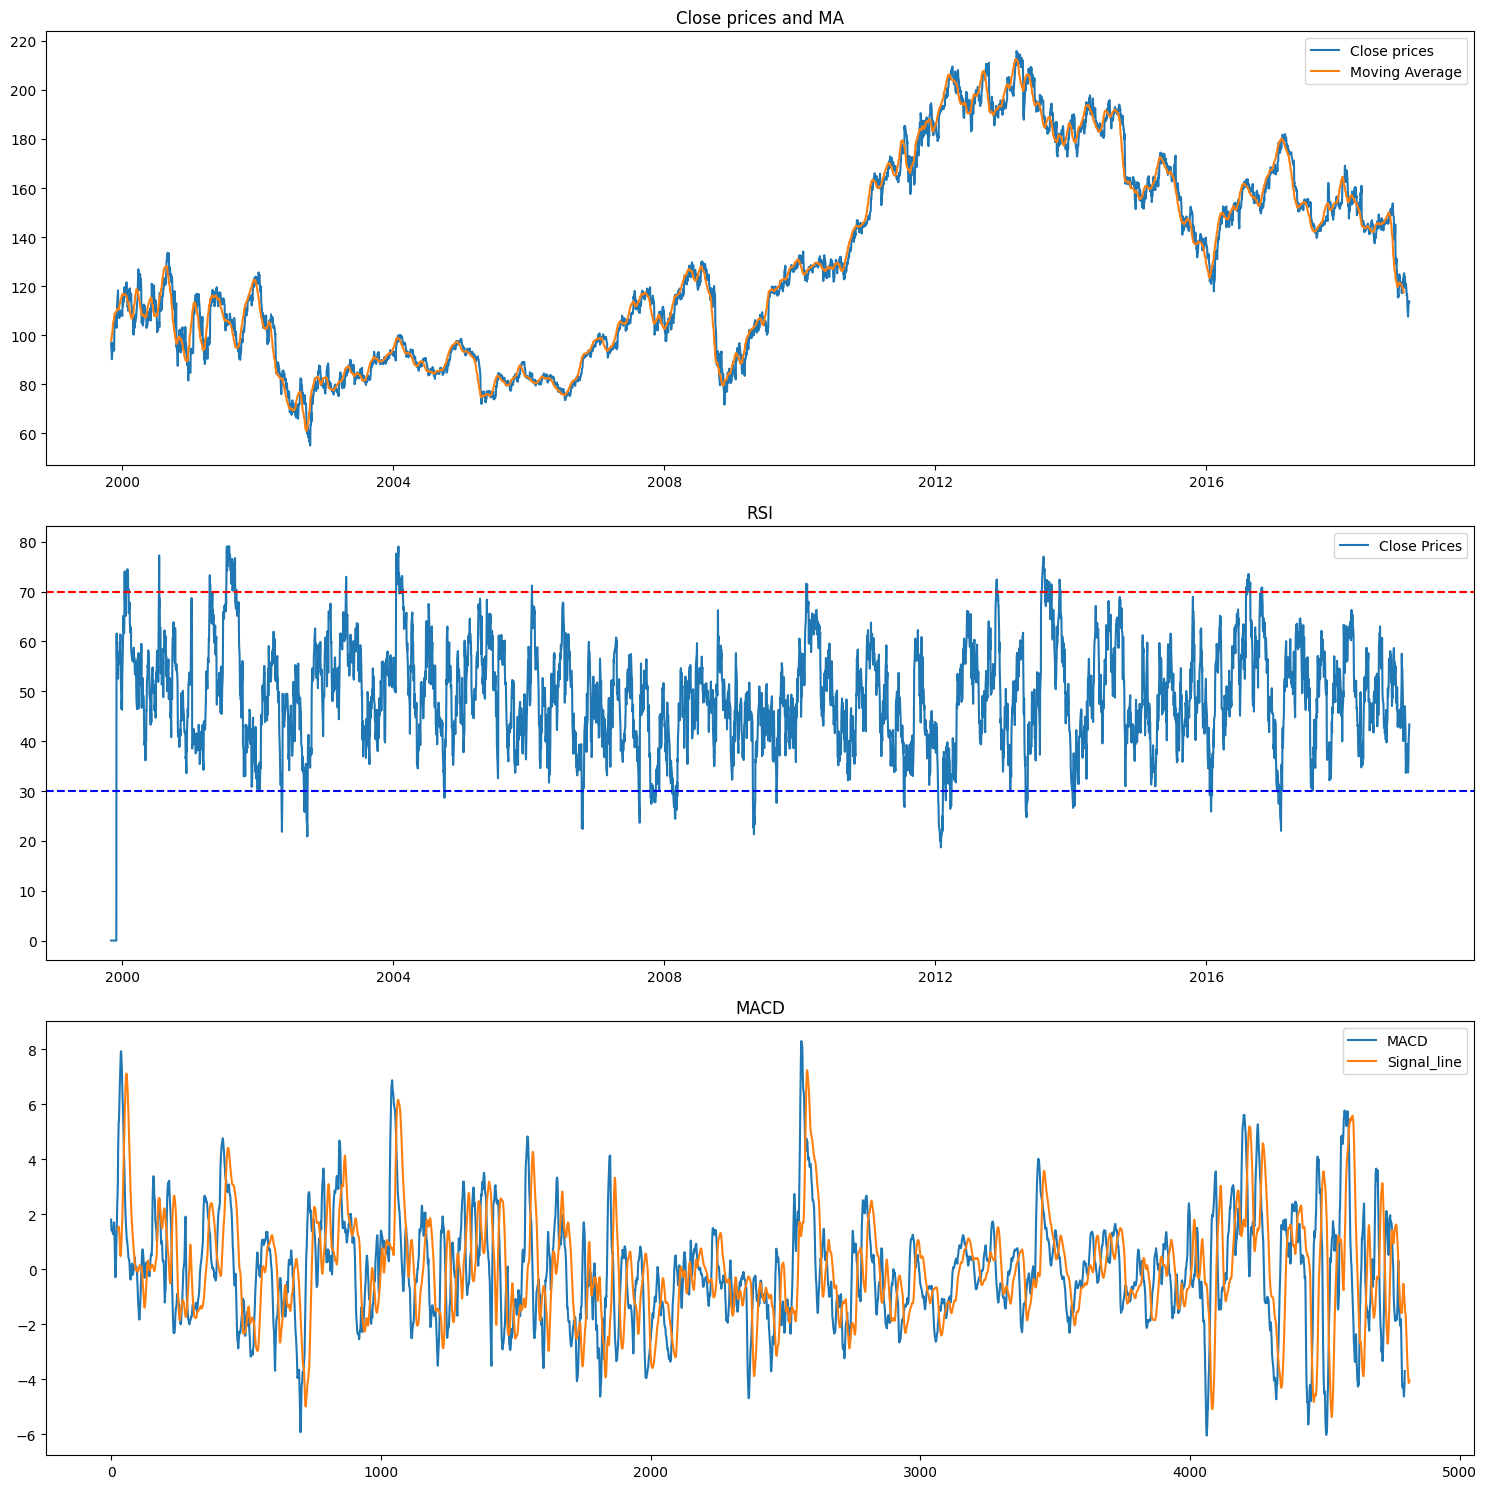





Yandex


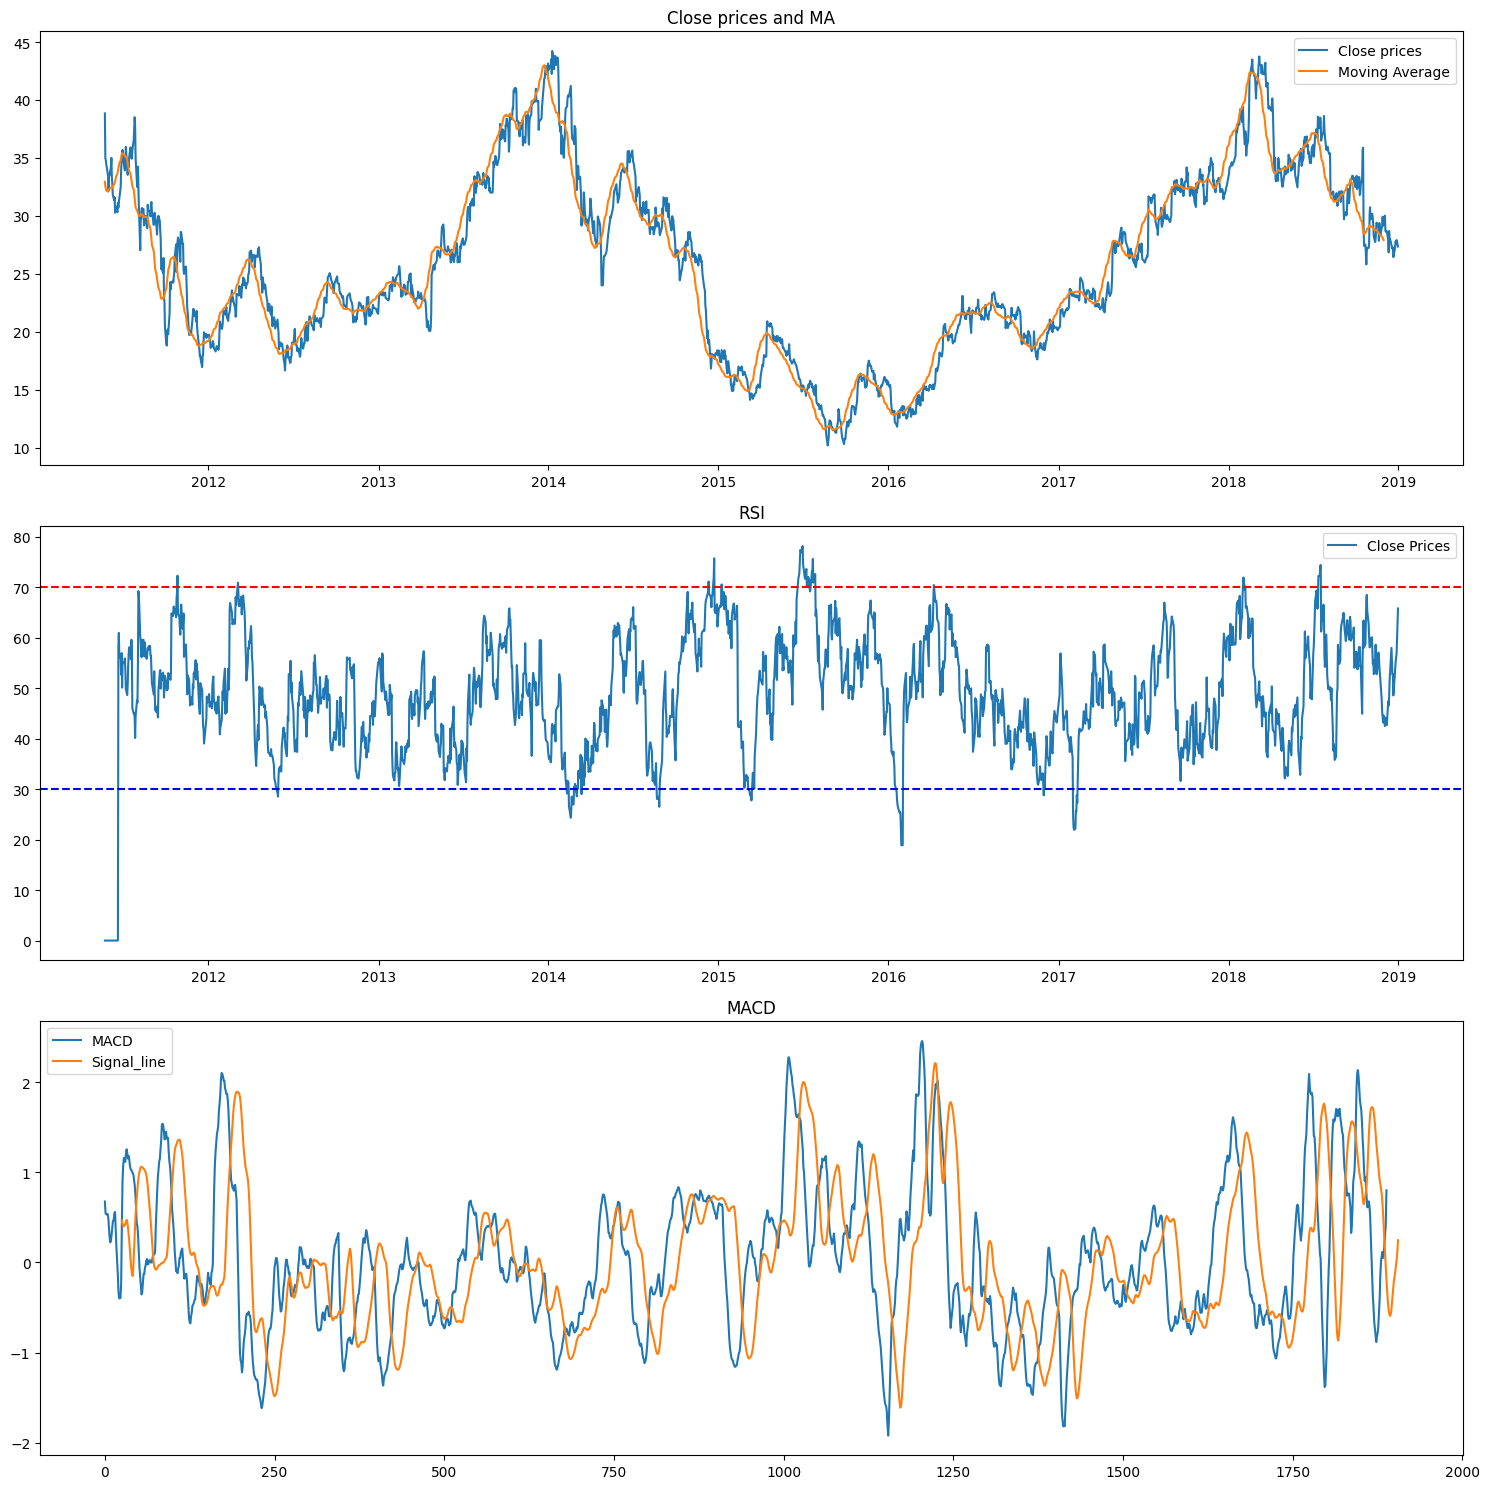





Mimecast Ltd


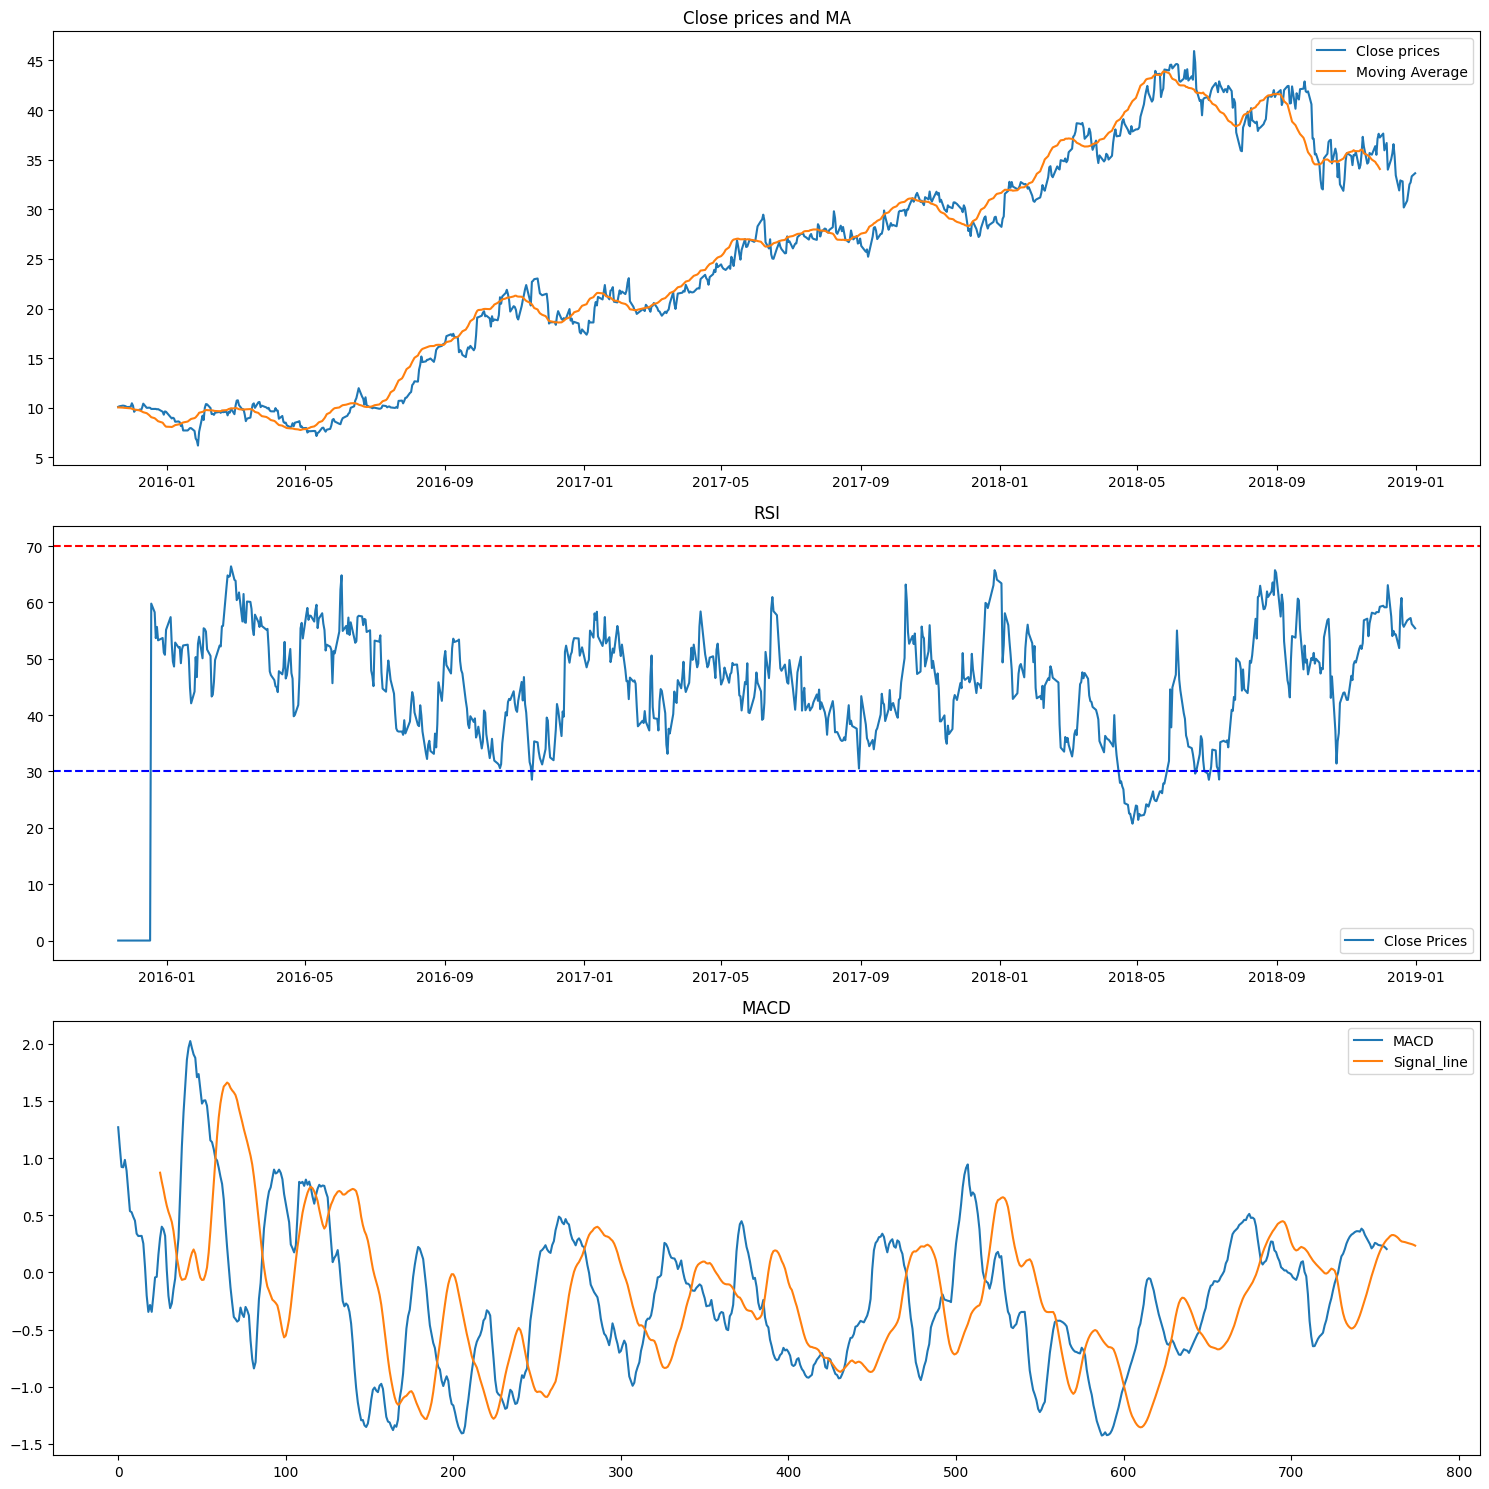

In [57]:
connection = psycopg2.connect(
  user="postgres", password="129053", host="localhost", port="5000", database="data_mart")
cursor = connection.cursor()

query_IBM = 'SELECT "Date_point", "Close" FROM companies_data WHERE "Name" = \'International Business Machines Corp\' ;'
query_YNDX = 'SELECT "Date_point", "Close" FROM companies_data WHERE "Name" = \'Yandex\' ;'
query_MIME = 'SELECT "Date_point", "Close" FROM companies_data WHERE "Name" = \'Mimecast Ltd\' ;'

cursor.execute(query_IBM)
t = cursor.fetchall()
IBM_dates = [i[0] for i in t]
IBM_records = [i[1] for i in t]

cursor.execute(query_YNDX)
t = cursor.fetchall()
YNDX_dates = [i[0] for i in t]
YNDX_records = [i[1] for i in t]

cursor.execute(query_MIME)
t = cursor.fetchall()
MIME_dates = [i[0] for i in t]
MIME_records = [i[1] for i in t]

period = 20
print('International Business Machines Corp')
fig, axs = plt.subplots(3, figsize=(15, 15))

ma_ibm = ma(IBM_records, period)
axs[0].plot(IBM_dates, IBM_records, label='Close prices')
axs[0].plot(IBM_dates, ma_ibm, label='Moving Average')
axs[0].set_title('Close prices and MA')
axs[0].legend()

rsi_res_ibm = rsi(IBM_records, period)[1:][::-1]
axs[1].plot(IBM_dates, rsi_res_ibm, label='Close Prices')
axs[1].axhline(70, color='red', linestyle='--')
axs[1].axhline(30, color='blue', linestyle='--')
axs[1].set_title('RSI')
axs[1].legend()

macd_line_ibm, signal_line = macd(IBM_records)
axs[2].plot(macd_line_ibm, label='MACD')
axs[2].plot(signal_line, label='Signal_line')
axs[2].set_title('MACD')
axs[2].legend()

plt.tight_layout()
plt.show()

print('\n\n\n')
print('Yandex')
fig, axs = plt.subplots(3, figsize=(15, 15))

ma_yndx = ma(YNDX_records, period)
axs[0].plot(YNDX_dates, YNDX_records, label='Close prices')
axs[0].plot(YNDX_dates, ma_yndx, label='Moving Average')
axs[0].set_title('Close prices and MA')
axs[0].legend()

rsi_res_yndx = rsi(YNDX_records, period)[1:][::-1]
axs[1].plot(YNDX_dates, rsi_res_yndx, label='Close Prices')
axs[1].axhline(70, color='red', linestyle='--')
axs[1].axhline(30, color='blue', linestyle='--')
axs[1].set_title('RSI')
axs[1].legend()

macd_line_yndx, signal_line = macd(YNDX_records)
axs[2].plot(macd_line_yndx, label='MACD')
axs[2].plot(signal_line, label='Signal_line')
axs[2].set_title('MACD')
axs[2].legend()

plt.tight_layout()
plt.show()

print('\n\n\n')
print('Mimecast Ltd')
fig, axs = plt.subplots(3, figsize=(15, 15))

ma_mime = ma(MIME_records, period)
axs[0].plot(MIME_dates, MIME_records, label='Close prices')
axs[0].plot(MIME_dates, ma_mime, label='Moving Average')
axs[0].set_title('Close prices and MA')
axs[0].legend()

rsi_res_mime = rsi(MIME_records, period)[1:][::-1]
axs[1].plot(MIME_dates, rsi_res_mime, label='Close Prices')
axs[1].axhline(70, color='red', linestyle='--')
axs[1].axhline(30, color='blue', linestyle='--')
axs[1].set_title('RSI')
axs[1].legend()

macd_line_mime, signal_line = macd(MIME_records)
axs[2].plot(macd_line_mime, label='MACD')
axs[2].plot(signal_line, label='Signal_line')
axs[2].set_title('MACD')
axs[2].legend()

plt.tight_layout()
plt.show()


In [51]:
# Занос индексов в БД Для IBM
query1 = 'INSERT INTO indexes_ibm ("rsi", "ma", "macd") VALUES (%s, %s, %s)'
for i in range(max( max(len(ma_ibm), len(rsi_res_ibm)), len(macd_line_ibm) )):
  rsi = rsi_res_ibm[i] if i < len(rsi_res_ibm) else None 
  ma = ma_ibm[i] if i < len(ma_ibm) else None
  macd = macd_line_ibm[i] if i < len(macd_line_ibm) else None
  cursor.execute(query1, (rsi, ma, macd))
connection.commit()

In [58]:
# Занос индексов в БД Для Yandex
query2 = 'INSERT INTO indexes_yndx ("rsi", "ma", "macd") VALUES (%s, %s, %s)'
for i in range(max( max(len(ma_yndx), len(rsi_res_yndx)), len(macd_line_yndx) )):
  rsi = rsi_res_yndx[i] if i < len(rsi_res_yndx) else None 
  ma = ma_yndx[i] if i < len(ma_yndx) else None
  macd = macd_line_yndx[i] if i < len(macd_line_yndx) else None
  cursor.execute(query2, (rsi, ma, macd))
connection.commit()

In [59]:
# Занос индексов в БД Для Mime
query3 = 'INSERT INTO indexes_mime ("rsi", "ma", "macd") VALUES (%s, %s, %s)'
for i in range(max( max(len(ma_mime), len(rsi_res_mime)), len(macd_line_mime) )):
  rsi = rsi_res_mime[i] if i < len(rsi_res_mime) else None 
  ma = ma_mime[i] if i < len(ma_mime) else None
  macd = macd_line_mime[i] if i < len(macd_line_mime) else None
  cursor.execute(query3, (rsi, ma, macd))
connection.commit()